<a href="https://colab.research.google.com/github/jamalromero/colab/blob/main/udl_ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Keep Python runtime and install java

In [ ]:
!apt install openjdk-17-jdk

Install Juyter Java kernel

In [ ]:
!pip install jbang
import jbang
jbang.exec("trust add https://github.com/jupyter-java")
jbang.exec("install-kernel@jupyter-java")

Change Runtime to Java kernel and test Java runtime.

In [ ]:
System.getProperty("java.version")

Load external script to include maven dependency, import packages and intial startup script. Example:

```
%%loadFromPOM
<dependency>
    <groupId>tech.tablesaw</groupId>
    <artifactId>tablesaw-core</artifactId>
    <version>0.43.1</version>
</dependency>

import java.util.stream.*;

System.getProperty("java.version");

```



In [5]:
%load /content/drive/MyDrive/colab/init_script.ipynb

In [ ]:
NDManager manager = NDManager.newBaseManager();

#Notebook 2.1 Supervised Learning
The purpose of this notebook is to explore the linear regression model discussed in Chapter 2 of the book.



In [10]:
// Create some input data
var x = manager.create(new double[]{0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90});
var y = manager.create(new double[]{0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6})

## Define 1D linear regression model
Equation: $y=\phi_0 + \phi_1x$

In [12]:
NDArray f1D(NDArray x, double phi0, double phi1) {
  return x.mul(phi1).add(phi0);
}

## Function to help plot the data

In [14]:
Canvas plot(NDArray x, NDArray y, double phi0, double phi1) {
  double[][] points = toDoubleArray(x.stack(y, 1));
  var canvas = ScatterPlot.of(points, '*', Color.BLUE).canvas();
  points = toDoubleArray(x.stack(f1D(x, phi0, phi1), 1));
  canvas.add(LinePlot.of(points, Color.RED));
  return canvas;
}

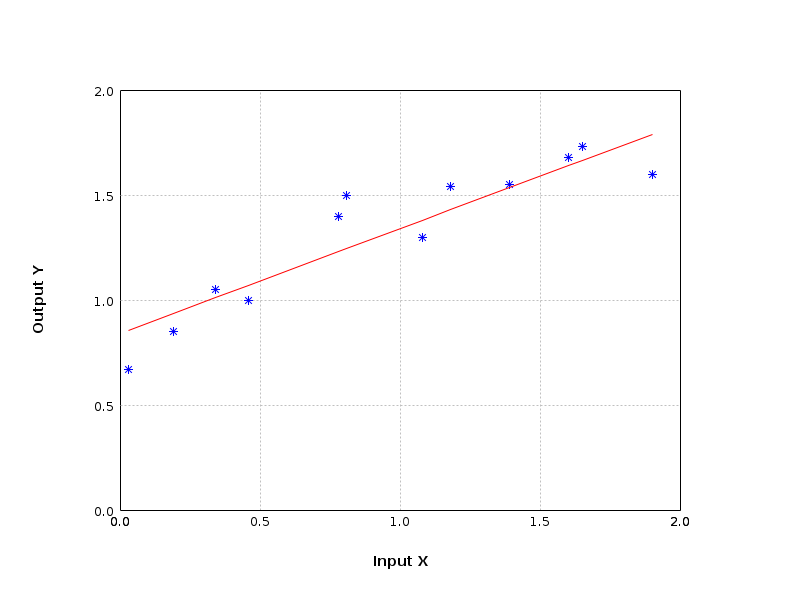

In [16]:
var canvas = plot(x, y, 0.84, 0.5);
canvas.setBound(new double[]{0f, 0f}, new double[]{2f, 2f});
canvas.setAxisLabels("Input X", "Output Y");
canvas.toBufferedImage(800, 600)

## Function to calculate the loss

In [18]:
double computeLoss(NDArray x, NDArray y, double phi0, double phi1) {
    var y_hat = f1D(x, phi0, phi1);
    double loss =  y.sub(y_hat).pow(2).sum().toDoubleArray()[0];
    return loss;
}

Change the parameters manually to fit the model

First fix $\phi_1$ and try changing $\phi_0$ until you can't make the loss go down any more

Then fix $\phi_0$ and try changing $\phi_1$ until you can't make the loss go down any more

Repeat this process until you find a set of parameters that fit the model as in figure 2.2d

You can either do this by hand, or if you want to get fancy, write code to descent automatically in this way

Start at these values: $\phi_0 = 0.75$ and $\phi_1 = 0.54$

In [20]:
double phi0 = 0.75; double phi1 = 0.54;
var loss = computeLoss(x, y, phi0, phi1);
System.out.printf("Calculated Loss is %,.2f for phi0 = %,.2f, phi1 = %,.2f %n", loss, phi0, phi1);
phi0 = 1.6; phi1 = -0.8;
loss = computeLoss(x, y, phi0, phi1);
System.out.printf("Calculated Loss is %,.2f for phi0 = %,.2f, phi1 = %,.2f %n", loss, phi0, phi1);
phi0 = 0.84; phi1 = 0.5;
loss = computeLoss(x, y, phi0, phi1);
System.out.printf("Calculated Loss is %,.2f for phi0 = %,.2f, phi1 = %,.2f %n", loss, phi0, phi1);

Calculated Loss is 0.24 for phi0 = 0.75, phi1 = 0.54 
Calculated Loss is 10.28 for phi0 = 1.60, phi1 = -0.80 
Calculated Loss is 0.20 for phi0 = 0.84, phi1 = 0.50 


java.io.PrintStream@4b10560b

In [22]:
phi0 = 0.77; phi1 = 0.57;
loss = computeLoss(x, y, phi0, phi1);
System.out.printf("Calculated Loss is %,.2f for phi0 = %,.2f, phi1 = %,.2f %n", loss, phi0, phi1);

Calculated Loss is 0.21 for phi0 = 0.77, phi1 = 0.57 


java.io.PrintStream@4b10560b

In [37]:
phi0 = 0.4 ; phi1 = 0.2;
var initial_loss = computeLoss(x,y,phi0,phi1);
System.out.printf("Calculated initial Loss is %,.2f for phi0 = %,.2f, phi1 = %,.2f %n", initial_loss, phi0, phi1);
double learning_rate = 0.01;
List<Double> losses = new ArrayList<>();
for(int i = 0; i < 200; i++) {
  var loss = computeLoss(x,y,phi0 + learning_rate, phi1 + learning_rate);
  if(loss < initial_loss) {
    phi0 += learning_rate;
    phi1 += learning_rate;
    initial_loss = loss;
    losses.add(loss);
  }
}
var minimum_loss = losses.stream().min(Double::compareTo).get();
System.out.printf("Calculated Loss is %,.2f for phi0 = %,.2f, phi1 = %,.2f %n", minimum_loss, phi0, phi1);

Calculated initial Loss is 7.07 for phi0 = 0.40, phi1 = 0.20 
Calculated Loss is 0.21 for phi0 = 0.77, phi1 = 0.57 


java.io.PrintStream@4b10560b

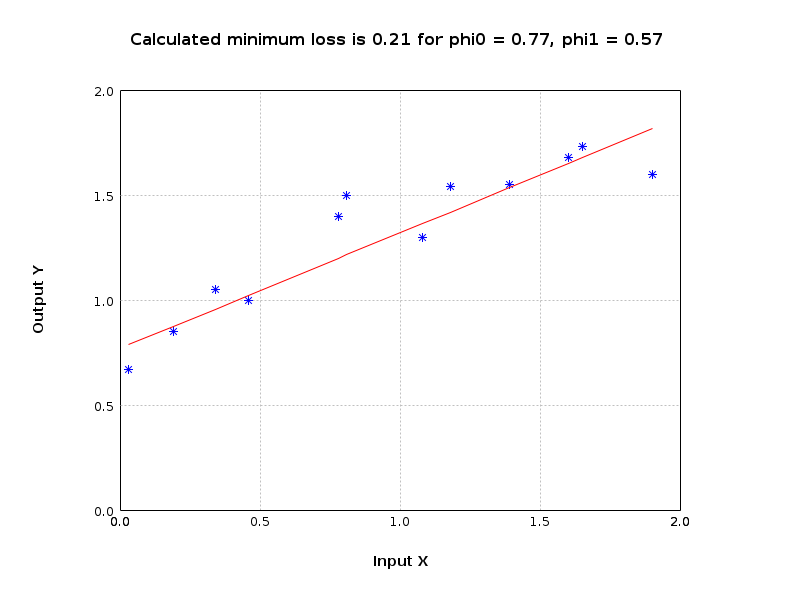

In [49]:
var canvas = plot(x, y, 0.77, 0.55);
canvas.setBound(new double[]{0f, 0f}, new double[]{2f, 2f});
canvas.setAxisLabels("Input X", "Output Y");
canvas.setTitle("Calculated minimum loss is 0.21 for phi0 = 0.77, phi1 = 0.57 ");
canvas.toBufferedImage(800, 600)

#Visualizing the loss function
The above process is equivalent to descending coordinate wise on the loss function
Now let's plot that function

In [99]:
var phi0 = manager.arange(0f, 2f, 0.02f, DataType.FLOAT64);
var phi1 = manager.arange(-1f, 1f, 0.02f, DataType.FLOAT64);
var gridMap = meshgrid(phi0, phi1);
var allLosses = manager.zeros(new Shape(phi0.size(), phi1.size()));
